# Проект "Рестораны Дакки"

С сайта kaggle был взят датасет, содержащий информацию о 1000 заведений общепита Дакки (данные взяты в Гугл.Карт). Используя этот датасет, проведём очистку данных, выявим закономерности и интересные особенности, также визуализируем результаты.

Датасет содержит:

    'Name' - название заведения
    'Reviews' - оценка заведения на Гугл.Картах
    'Number of riviews' - количество пользовательских оценок
    'Type' - тип ресторана, его кухня, направление
    'Address' - адрес
    ' Open Status (regular time)' - статус заведения на момент выгрузки данных (Открыто/Закрыто/Скоро закроется, etc.)
    'Close time' - время закрытия ресторана
    'Dine in' - возможность поесть в заведении
    'Takeway' - возможность забрать еду с собой

## Загрузка и предобработка

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

,Name,Reviews,Number of riviews,Type,Address,Open Status (regular time),Close time,Dine in,Takeway
0,Shakib's 75 Restaurant,4.2,436,Restaurant,"Ruapyan ZR Plaza, Level 9, Satmasjid Road, Roa...",Open,11 PM,yes,yes
1,Thai Chi Restaurant & Cafe,4.1,4474,Thai,"Bijay Sarani Rangs Bhaban, Level 7, 117/A, Pur...",Open,11:30 PM,No,NaN
2,Izumi Japanese Kitchen,4.5,1606,Japanese,"House no: 88, 24C Rd No 113/A",Closed,6 PM,yes,No
3,Krua Thai,3.9,1976,Thai,Bir Uttam Mir Shawkat Sarak,Open,11 PM,yes,No
4,Lucknow Dhaka,4.2,1503,Indian,E 60 Kemal Ataturk Ave,Closed,6 PM,yes,yes
...,...,...,...,...,...,...,...,...,...
1064,American Burger Bashundhara R/A New Outlet,5.0,1,Hamburger,"RC6F+VV7, Bashundhara Rd",NaN,NaN,Yes,Yes
1065,The Local Yard,NaN,NaN,Family-friendly,"Hazi Abdul Latif Mansion, Ka-9 Bashundhara Rd",NaN,NaN,Yes,Yes
1066,Time Pass,4.0,2,Restaurant,NaN,NaN,NaN,Yes,Yes
1067,Famous Sweets (Bashundhara),3.9,25,Restaurant,"Ka-54/3 Bashundhara Rd, Dhaka 1229 Bashundhara...",Closed,Opens 8 PM Fri,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         1067 non-null   object 
 1   Reviews                      1022 non-null   float64
 2   Number of riviews            1020 non-null   object 
 3   Type                         1067 non-null   object 
 4   Address                      1048 non-null   object 
 5    Open Status (regular time)  1021 non-null   object 
 6   Close time                   981 non-null    object 
 7   Dine in                      1061 non-null   object 
 8   Takeway                      1027 non-null   object 
dtypes: float64(1), object(8)
memory usage: 75.3+ KB
None
           Reviews
count  1022.000000
mean      4.049492
std       0.523905
min       1.000000
25%       3.900000
50%       4.100000
75%       4.300000
max       5.000000
[[<Axes: title={'center': '

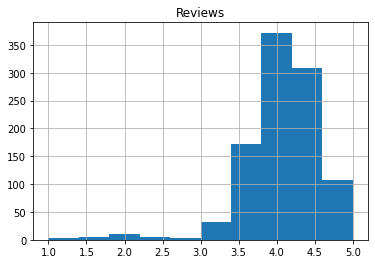

In [6]:
#Первый взгляд на датасет
df=pd.read_csv('/content/Dhaka restuarant.csv',encoding='latin-1')
display(df)
print(df.info())
print(df.describe())
print(df.hist())
print(df.columns)

In [7]:
#Переименуем столбцы, переведём в нужные форматы, избавимся от дубликатов
#Столбец " Open Status (regular time)" удалён, так как имел информацию о том, открыт ресторан или нет, на момент выгрузки данных, то есть неактуальную 
df = df.drop(' Open Status (regular time)', axis=1)
df.columns=['name', 'rating', 'number_of_reviews', 'type', 'address', 'close_time', 'dine_in', 'take_away']
print(df.duplicated().sum())
df=df.drop_duplicates(ignore_index=True)
df=df.drop_duplicates(subset='name',ignore_index=True)
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df['number_of_reviews']=abs(df['number_of_reviews'])

20


In [8]:
display(df.query('rating<1'))
display(df.query('rating>5'))
#Отзывов, выходящих за 5-балльную систему, нет 

,name,rating,number_of_reviews,type,address,close_time,dine_in,take_away


,name,rating,number_of_reviews,type,address,close_time,dine_in,take_away


In [9]:
print(df['type'].unique())
df=df.query('type!="Medical clinic"')
#Удаляем места, не относящиеся к ресторанам

['Restaurant' 'Thai' 'Japanese' 'Indian' 'Fine Dining' 'Italian' 'Steak'
 'Korean' 'Pan Asian' 'Buffet' 'Cantonese' 'Asian' 'Bangladeshi' 'Mexican'
 'Lebanese' 'Seafood' 'Fusion restaurant' 'Chinese' 'Turkish' 'Western'
 'Pizza' 'Family-friendly' 'Fast Food' 'Biryani' 'Barbecue' 'Sushi'
 'Sri Lankan' 'South Indian' 'Biriyani Restaurant' 'Vegetarian'
 'Kebab shop' 'Bakery' 'Delivery service' 'Shopping mall' '5-star hotel'
 'Boarding house' 'Tourist attraction' 'Apartment building'
 'Medical clinic' 'Chicken' 'American' 'Hamburger' nan
 'Continental restaurant' 'Asian Fusion' 'Food court' 'Grill' 'Bar' 'Cafe'
 'Hot Pot' 'Bengali' 'Wok restaurant' 'Traditional restaurant'
 'Portuguese' 'Modern European' 'Malaysian' 'Down Home Cooking'
 'Momo restaurant' 'Middle Eastern' 'Arab restaurant']


In [10]:
df['close_time']=df['close_time'].astype(str)
df['close_time']=df['close_time'].apply(lambda x:x.strip()).apply(lambda x:x.replace('   ',' ')).apply(lambda x:x.replace('  ',' ')).apply(lambda x:x.replace('11:00 PM','11 PM'))
df['close_time'].unique()
#Добавил красоты

array(['11 PM', '11:30 PM', '6 PM', '1 PM', '12 PM', '10:30 PM', '10 PM',
       '10:45 PM', '6:30 PM', 'nan', '12:30 PM', '5:30 PM', '7 PM',
       '8 PM', '2 PM', '9:45 PM', '11:45 PM', '3 PM', '8:30 PM', '9 PM',
       '7 PM Fri', '12 PM Fri', '9 PM Sat', '7 PM 9 PM Fri',
       '10:30 PM Fri', '10:01 PM', '1:30 PM', '11:59 PM', '9:30 PM',
       '5:30 PM Fri', '10:50 PM', '2:30 PM', '10:15 PM', '8 PM 10 PM Fri',
       '11 PM Fri', '11:30 PM Fri', '12:22 PM', '4 PM', '11:15 PM',
       '8 PM 9:30 PM Fri', 'Opens 8 PM Fri', 'Opens 8 PM Sat'],
      dtype=object)

In [11]:
df['dine_in'].unique()
df['dine_in']=df['dine_in'].map({'yes':True,'No':False,'Yes':True,'Yes ':True,'yEs':True})
#Заменим да/нет на boolean

In [12]:
df['take_away'].unique()
df['take_away']=df['take_away'].map({'yes':True,'No':False,'Yes':True,'food':True,'No ':False,'Delivery':True})
#Аналогично

## Анализ

count    850.000000
mean       4.041051
std        0.544182
min        1.000000
25%        3.900000
50%        4.100000
75%        4.300000
max        5.000000
Name: rating, dtype: float64


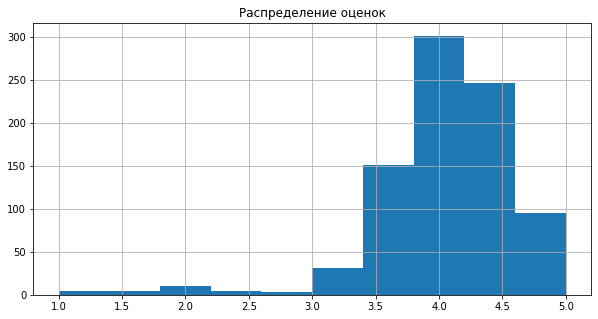

In [13]:
print(df['rating'].describe())
df['rating'].hist(bins=10,figsize=(10,5),grid=True)
plt.title('Распределение оценок');

Большая часть оценок колеблется от 3.5 до 4.5, средняя - 4.0.

### Худшие и лучшие популярные рестораны (имеющие много оценок) 

In [14]:
df.query('rating<2 & number_of_reviews>9')

,name,rating,number_of_reviews,type,address,close_time,dine_in,take_away
79,Almas Restaurant,1.8,10.0,Restaurant,"5/Kha, Kayettuly Lane, Dhaka",10:30 PM,True,True
203,DJ JSK,1.9,15.0,Bangladeshi,NaN,nan,True,True


In [15]:
x=df.iloc[57]['name']
df=df.query('name!=@x')
df.query('rating==5 & number_of_reviews>9')

,name,rating,number_of_reviews,type,address,close_time,dine_in,take_away
137,AL-LADAK Arabian Cuisine & Party Center,5.0,22.0,Lebanese,"The Royal Paradise, House 5 Rd No 74",11 PM,True,True
206,Shudha Restaurant,5.0,45.0,Restaurant,PCM6+8RM,nan,True,True
220,Sikder Hotel & Restaurant,5.0,18.0,Bangladeshi,18 Isshar Chandra Shil Bahadur Street,nan,True,True
224,Maa Khabar Ghor,5.0,70.0,Bangladeshi,"89/A/7, R.K Mission Road, Gopibagh",12 PM,True,True
781,La Royale,5.0,16.0,Restaurant,"ka-15/3; Azmeri Garden- 3rd Floor Bashundhara,...",10 PM,True,False
877,Layers Of Fries,5.0,12.0,Restaurant,Aiub university gate road,10:30 PM,True,True


### Самые популярные рестораны

In [16]:
df.sort_values(by='number_of_reviews',ascending = False).head(10)

,name,rating,number_of_reviews,type,address,close_time,dine_in,take_away
30,Star Hotel & Kabab,4.1,24623.0,Bangladeshi,"22, House 16 Road No. 2",nan,True,NaN
6,Star Kabab & Restaurant,4.2,20010.0,Restaurant,"House"" ""15 Rd no. 17, Block"" "" C",11:30 PM,True,False
54,Chef's Table Gulshan,4.5,6873.0,Restaurant,"Level 2, Gulshan Centre Point, Rd 90",11 PM,True,False
1,Thai Chi Restaurant & Cafe,4.1,4474.0,Thai,"Bijay Sarani Rangs Bhaban, Level 7, 117/A, Pur...",11:30 PM,False,NaN
67,The Manhattan FISH MARKET Bangladesh,4.2,4208.0,Seafood,"Awal center, 34 Kemal Ataturk Ave",10 PM,True,True
90,Four Seasons Restaurant,4.1,3778.0,Chinese,"new, 27, House No. 59 A, Road No. 16, Old Satm...",6 PM,True,NaN
51,Royal Cuisine Restaurant (Uttara),3.8,3344.0,Buffet,"Natore Tower, House#32/D/E, 14thFloor, Road"" ""3",10:30 PM,True,False
80,The Dining Lounge Khilgaon,3.9,3178.0,Restaurant,"Shotodol Rose Heights, 373/B, Level 3, Shahid ...",11 PM,True,True
9,Alfresco,4.2,2915.0,Restaurant,"84, Sky Lark 11 level 9, plot no Road No. 11",10:30 PM,True,True
15,Adda Multi Cuisine Restaurant,4.0,2563.0,Pan Asian,"House#8,Road#4",11 PM,True,True


Два ресторана (Star Hotel & Kabab и  Star Kabab & Restaurant) имеют оценок более чем в три раза по сравнению с другими ресторанами (20к и 24.6к против следующих 6.9к и 4.5к).

In [17]:
df['number_of_reviews'].describe()

count      699.000000
mean       356.859800
std       1317.254052
min          1.000000
25%          8.500000
50%         66.000000
75%        353.000000
max      24623.000000
Name: number_of_reviews, dtype: float64

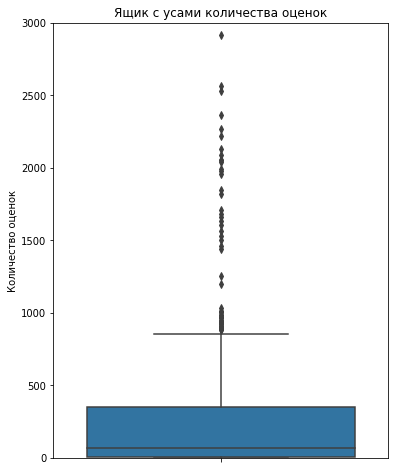

In [18]:
plt.figure(figsize=(6,8))
plt.title('Ящик с усами количества оценок')
q=sns.boxplot(y=df['number_of_reviews'])
q.set_ylim(bottom=0, top=3000)
q.set_ylabel('Количество оценок');

Большинство заведений имеют до 400 оценок.

### Типы заведений


In [19]:
arr=df.pivot_table(index='type',values='name',aggfunc='count',).reset_index().sort_values(by='name',ascending=False).head(8)
q=arr['type'].tolist()
df['type1']=df['type']
for x in range(len(df)):
  if df['type1'].iloc[x] not in q:
    df['type1'].iloc[x]='Other'
g = go.Figure(data=[go.Pie(title='Типы заведений',labels=df.groupby('type1')['type1'].count().index,\
                           values=df.groupby('type1')['type1'].count())])
g

Более 55% заведений (491) - рестораны, далее популярными категориями являются бангладешская кухня, фаст-фуд и китайская. Категории, не входящие в топ-10, были объединены в общую категорию "Other". 

### Время закрытия

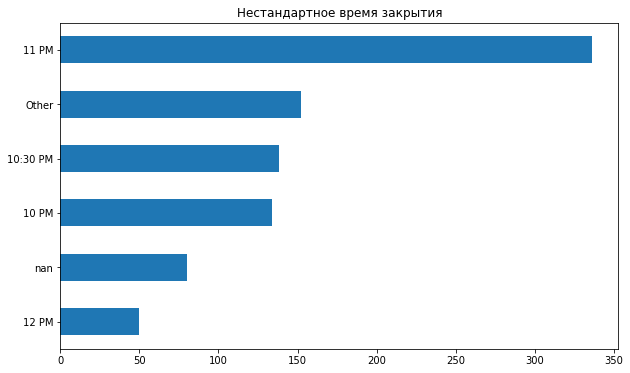

In [20]:
arr1=df.groupby('close_time')['name'].count().reset_index().sort_values(by='name',ascending = False).head(5)
arr1=arr1['close_time'].tolist()
df['close_time1']=df['close_time']
for x in range(len(df)):
  if df['close_time1'].iloc[x] not in arr1:
    df['close_time1'].iloc[x]='Other'
df.pivot_table(index='close_time1',values='name',aggfunc='count').sort_values(by='name')\
.plot(kind='barh', legend=False,title='Нестандартное время закрытия',figsize=(10,6),xlabel='');

Более трети ресторанов (340) закрываются в 11 вечера, чуть менее 150 в 10:30 и в 10, также большая группа (150 заведений) закрывается в другое, более индивидуальное время, поэтому имеет категорию "Other"

### Take away

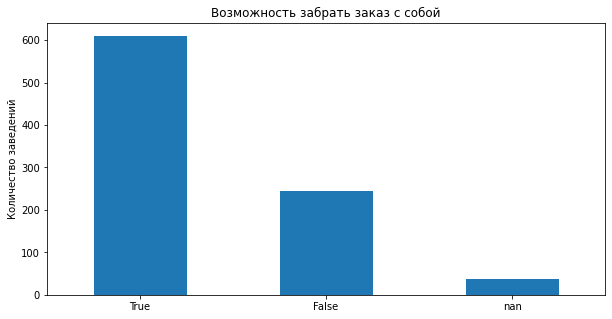

In [21]:
df['take_away'].value_counts(dropna=False).plot(kind='bar',\
                                                title='Возможность забрать заказ с собой',figsize=(10,5),ylabel='Количество заведений')
plt.xticks(rotation=0);

В 600 заведений данная услуга есть, в 250 отсутствует. 

Сравним категории между собой:

In [22]:
away=df.query('take_away==True')
no_away=df.query('take_away==False')
print('Средняя оценка заведений без take away: {:.1f}'.format(no_away['rating'].mean()))
print('Средняя оценка заведений с take away: {:.1f}'.format(away['rating'].mean()))
print('Среднее количество оценок заведений без take away: {:.1f}'.format(no_away['number_of_reviews'].mean()))
print('Среднее количество оценок заведений с take away: {:.1f}'.format(away['number_of_reviews'].mean()))

Средняя оценка заведений без take away: 4.1
Средняя оценка заведений с take away: 4.0
Среднее количество оценок заведений без take away: 478.8
Среднее количество оценок заведений с take away: 256.4


Категории заведений без take away:

In [24]:
g = go.Figure(data=[go.Pie(title='Типы заведений',labels=no_away.groupby('type1')['type1'].count().index,\
                           values=no_away.groupby('type1')['type1'].count())])
g

Категории заведений с take away:

In [25]:
g = go.Figure(data=[go.Pie(title='Типы заведений',labels=away.groupby('type1')['type1'].count().index,\
                           values=away.groupby('type1')['type1'].count())])
g